In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [9]:
path = '../cifar-10-python/cifar-10-batches-py/data_batch_1'
dict1 = unpickle(path)

In [ ]:
dict1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [10]:
X_train = np.asarray(dict1[b'data'])

In [144]:
X_train[:1,]

array([[ 59,  43,  50, ..., 140,  84,  72]], dtype=uint8)

In [145]:
X_train.shape

(10000, 3072)

In [11]:
y_train = np.asarray(dict1[b'labels'])

y_train = y_train[:,np.newaxis]


In [13]:
path1 = '../cifar-10-python/cifar-10-batches-py/test_batch'
test_dict = unpickle(path1)
X_test = np.asarray(test_dict[b'data'])
y_test = np.asarray(test_dict[b'labels'])
y_test = y_test[:,np.newaxis]
X_test = X_test/255.0

In [16]:
names = ['data_batch_2','data_batch_3','data_batch_4','data_batch_5']
for i in names:
    path = '../cifar-10-python/cifar-10-batches-py/'+i
    data_dict = unpickle(path)
    x = np.asarray(data_dict[b'data'])
    y = np.asarray(data_dict[b'labels'])
    y = y[:,np.newaxis]
    X_train = np.vstack((X_train,x))
    y_train = np.vstack((y_train,y))

In [17]:
X_train = X_train/255.0

In [18]:
y_train.shape

(50000, 1)

## KNN

In [54]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

/home/umar/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [13]:
a = model.predict(X_train[:10,])

In [14]:
b = y_train[:10]

In [15]:
a = a[:,np.newaxis]
a.shape

(10, 1)

In [16]:
b.shape

(10, 1)

In [17]:
print('This is not the actual way to get accuracy but it just to visualize things.\n Out of first ten predictions 4 are correct \n',a==b)

This is not the actual way to get accuracy but it just to visualize things.
 Out of first ten predictions 4 are correct 
 [[False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]]


In [21]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

In [23]:
y_pred = y_pred[:,np.newaxis]

In [25]:
accuracy_score(y_pred,y_test)*100

33.03

## The 33 percent accuracy of Knn is not good but still better than 10 percent of picking randomly from 10 classes

## Neural Network


In [5]:
class TinyModel(torch.nn.Module):
    def __init__(self):
        super(TinyModel,self).__init__()
        self.linear1 = torch.nn.Linear(3072,176)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(176,10)
        self.softmax = torch.nn.Softmax()
    def forward(self,x):
        x = self.activation(self.linear1(x))
        x = self.softmax(self.linear2(x))
        return x
    
model = TinyModel()
        
        

In [6]:
optimiser = torch.optim.SGD(model.parameters(),lr=0.001)
loss = torch.nn.CrossEntropyLoss()

In [8]:
x = torch.tensor(X_train.astype(np.float32))
y = torch.tensor(y_train.astype(np.float32))

NameError: name 'X_train' is not defined

In [58]:
y=np.squeeze(y, axis=1)
y=y.type(torch.LongTensor)

In [59]:
print(x.size(),y.size())

torch.Size([50000, 3072]) torch.Size([50000])


In [60]:
#training loop
epoch = 500
for i in range(epoch):
    #logits
    l = model(x)
    #cost function
    J = loss(l,y)
    # set grad to zero
    optimiser.zero_grad()
    # back propogate
    J.backward()
    optimiser.step()

/tmp/ipykernel_669240/2891697456.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.linear2(x))


In [63]:
x.size()

torch.Size([50000, 3072])

In [66]:
x_test_nn = torch.tensor(X_test.astype(np.float32))
y_test_nn = torch. tensor(y_test.astype(np.float32))
with torch.no_grad():
    y_pred_nn = model(x_test_nn)
y_pred_nn.size()
    

/tmp/ipykernel_669240/2891697456.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.linear2(x))


torch.Size([10000, 10])

In [76]:
y_pred_np = y_pred_nn.numpy()
y_pred_np.shape

(10000, 10)

In [78]:
# Now pick the highest value index for each row instead of probabilities of every class
y_pred_np = np.argmax(y_pred_np, axis =1)
y_pred_np = y_pred_np[:,np.newaxis]


In [80]:
accuracy_score(y_pred_np[:10],y_test[:10])

0.1

## CNN

### Define Model

In [19]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = torch.nn.Conv2d(3,6,5)
        self.conv2 = torch.nn.Conv2d(6,16,5)
        self.pool = torch.nn.MaxPool2d(2,2)
        self.activation = torch.nn.ReLU()
        self.fc1 = torch.nn.Linear(16*5*5,120)
        self.fc2 = torch.nn.Linear(120,84)
        self.fc3 = torch.nn.Linear(84,10)
    def forward(self,x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = torch.flatten(x,1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [20]:
optim = torch.optim.SGD(net.parameters(),lr = 0.001,momentum=0.9) # optimizer for backpropogation
loss = torch.nn.CrossEntropyLoss()

In [21]:
X_train_cnn = torch.tensor(X_train.astype(np.float32).reshape(-1,3,32,32))

In [22]:
y_train_cnn = torch.tensor(np.squeeze(y_train.astype(np.float32),axis=1))
y_train_cnn = y_train_cnn.long()

y_train_cnn.size()

torch.Size([50000])

In [23]:
train_dataset = torch.utils.data.TensorDataset(X_train_cnn,y_train_cnn)

In [24]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size= 4, shuffle = True)


In [25]:
n_epochs = 20
for epochs in range(n_epochs):
    losses = []
    for batch in train_dataloader:
        x,y = batch
    
        # x.size = batch:4 x channels:3 x dim:32 x dim:32 
#         batch = x.size(0)
#         x = x.view(batch,-1)
        #logits
        l = net(x)     
        #print(y.type())
        #loss function
#         y = torch.squeeze(y,1)
#         y = y.long()
        J = loss(l,y)
        
        #cleaning the gradients
        net.zero_grad()
        
        #backpropogation
        J.backward()
        
        #step
        optim.step()
        losses.append(J.item())
    print(f'Epoch{epochs +1},trainloss:{torch.tensor(losses).mean():.2f}')
        
        
        

Epoch1,trainloss:1.94
Epoch2,trainloss:1.53
Epoch3,trainloss:1.41
Epoch4,trainloss:1.34
Epoch5,trainloss:1.27


KeyboardInterrupt: 

### save model

In [26]:
path = './cifar.pth'
torch.save(net.state_dict(),path)

In [27]:
# test data
x_test_cnn = torch.tensor(X_test.astype(np.float32).reshape(-1,3,32,32))


In [28]:
y_test_cnn = torch.tensor(np.squeeze(y_test,1))
y_test_cnn = y_test_cnn.long()

In [29]:
y_test_cnn

tensor([3, 8, 8,  ..., 5, 1, 7])

In [30]:
test_dataset = torch.utils.data.TensorDataset(x_test_cnn, y_test_cnn)
test_dataloader = torch.utils.data.DataLoader(test_dataset,batch_size=4)

In [31]:
dataiter = iter(test_dataloader)
img, label = dataiter.next() 

print(img.size(),label.size())

torch.Size([4, 3, 32, 32]) torch.Size([4])


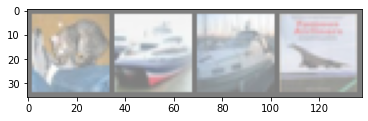

In [32]:
import torchvision
import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(img))

In [33]:
net1 = Net()
net1.load_state_dict(torch.load('./cifar.pth'))

<All keys matched successfully>

In [34]:
outputs = net1(img)

In [197]:
outputs

tensor([[-3.1833, -1.8391,  1.0833,  6.7899, -1.2626,  4.4926, -1.6311, -0.4005,
         -5.3129, -1.9366],
        [ 4.0656, -0.1633, -0.3419, -3.7264,  0.9972, -3.7424, -0.6255, -5.9417,
          5.8825,  0.4736],
        [ 1.3678, -0.4381, -0.4987,  0.0314,  1.1185, -1.3661, -1.9553, -1.1260,
          2.9349, -0.3160],
        [11.1917, -0.3167,  3.8810, -1.7367,  0.1558, -5.7451, -2.8671, -8.7746,
          5.8866, -0.1777]], grad_fn=<AddmmBackward0>)

In [35]:
values, prediction = torch.max(outputs,1) # max from each row
print(prediction)

tensor([3, 9, 1, 0])


In [36]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('Predicted: ', ' '.join(f'{classes[prediction[j]]:5s}'
                              for j in range(4)))
print('GroundTruth: ', ' '.join(f'{classes[label[j]]:5s}' for j in range(4)))

Predicted:  cat   truck car   plane
GroundTruth:  cat   ship  ship  plane


In [37]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        img, labels = data
        l = net1(img)
        
        #class with heighest energy
        _,predictions = torch.max(l,1)
        total +=labels.size(0)
        correct +=(predictions == labels).sum().item()
print(f'The accuracy of the model is: {100 * correct//total}')  

The accuracy of the model is: 54


In [38]:
correct_pred = {classname:0 for classname in classes}
total_per_class = {truth:0 for truth in classes}
i=1
with torch.no_grad():
    for data in test_dataloader:
        x,y = data
        l = net1(x)
        _,prediction = torch.max(l,1)
        if i == 1:
            i = i+1
        for label, pred in zip(y,prediction):
            if label == pred:
                correct_pred[classes[label]] +=1
              
            total_per_class[classes[label]] +=1
print(correct_pred)
print(total_per_class)
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_per_class[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

{'plane': 706, 'car': 662, 'bird': 393, 'cat': 373, 'deer': 552, 'dog': 469, 'frog': 564, 'horse': 528, 'ship': 524, 'truck': 635}
{'plane': 1000, 'car': 1000, 'bird': 1000, 'cat': 1000, 'deer': 1000, 'dog': 1000, 'frog': 1000, 'horse': 1000, 'ship': 1000, 'truck': 1000}
Accuracy for class: plane is 70.6 %
Accuracy for class: car   is 66.2 %
Accuracy for class: bird  is 39.3 %
Accuracy for class: cat   is 37.3 %
Accuracy for class: deer  is 55.2 %
Accuracy for class: dog   is 46.9 %
Accuracy for class: frog  is 56.4 %
Accuracy for class: horse is 52.8 %
Accuracy for class: ship  is 52.4 %
Accuracy for class: truck is 63.5 %
